<a href="https://colab.research.google.com/github/IamSamage/GW-Signal-Analysis/blob/main/Gw150917_H1_SNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

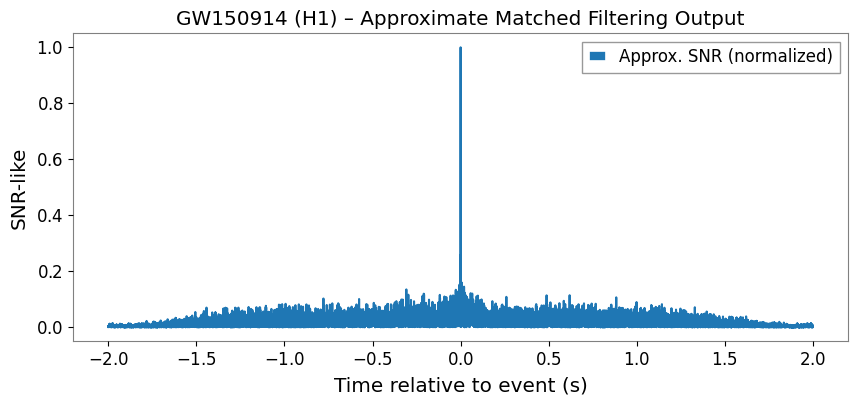

In [ ]:
!pip install gwpy --quiet

from gwpy.timeseries import TimeSeries
from gwpy.signal.filter_design import bandpass
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate

event_time = 1126259462.4
start = event_time - 4
end = event_time + 4

strain = TimeSeries.fetch_open_data('H1', start, end, sample_rate=4096)

data = strain.crop(event_time - 2, event_time + 2)

filt = bandpass(20, 400, data.sample_rate.value)
data = data.filter(filt)

white = data.whiten(2, 1)  # 2초 window, 1초 half-window → 데이터 길이와 호환됨

template = white.crop(event_time - 0.1, event_time + 0.1)
whitened = white.value - np.mean(white.value)
templ = template.value - np.mean(template.value)

corr = correlate(whitened, templ, mode='same')
snr_like = np.abs(corr)

t = white.times.value - event_time

plt.figure(figsize=(10, 4))
plt.plot(t, snr_like / np.max(snr_like), label="Approx. SNR (normalized)")
plt.xlabel("Time relative to event (s)")
plt.ylabel("SNR-like")
plt.title("GW150914 (H1) – Approximate Matched Filtering Output")
plt.legend()
plt.grid()
plt.show()
